<a href="https://colab.research.google.com/github/sheldonkemper/portfolio/blob/main/Activity_DecisionTreesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Trees**

## **1. Preprocessing**
   - 1.1 Importing packages and data.
   - 1.2 Data Exploration: Check feature descriptions, missing values, odd characters, and imbalance in the dataset. Visualizing the distribution of features, and correlation analysis.

## **2. Transformations**
   - 2.1 Handle missing values, odd characters, and split the data. Apply any other transformations that you might consider necessary (e.g. OHE, Scaling, Imputation).

## **3. Basic Decision Tree Models**
   - 3.1 Train and evaluate a Simple Decision Tree using either Gini or Entropy.
   - 3.2 Visualise the tree.
   - 3.3 Train and evaluate a Simple Decision Tree using both `max_depth` and `min_samples_leaf`.
   - 3.4 Visualise the tree.
   - 3.5 Compare performance.

## **4. Ensemble Methods and Their Comparison**
   - 4.1 Train and evaluate a Random Forest.
   - 4.2 Train and evaluate a Simple Decision Tree using both `max_depth` and `min_samples_leaf`.
   - 4.3 Compare performance: Compare Random Forest against the simple Decision Tree.

# **Activity**

* You are required to implement a classification tree algorithm to solve a bank churn scenario.

* Follow the steps provided above in order to solve this problem.

* You are provided with all the necessary packages and helper function (if needed) to complete the exercise.


# 1.Pre-processing
### 1.1 Importing Packages and data



In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    print("ROC Score:", roc_auc_score(y_test, predictions))
    print("Accuracy Score", accuracy_score(y_test, predictions))


np.random.seed(0)

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/C2_W5_Datasets/bank_churn_data_raw.csv", index_col=0)


### 1.2 Data Exploration

* Check for: feature descriptions, missing values, data types, odd characters, and imbalance in the dataset.
* Visualise the distribution of features, and correlation analysis.


In [2]:
# Checking for missing values
print(df.isnull().sum())

# Checking data types
print(df.dtypes)

# Check for unique values in categorical columns (odd characters, etc.)
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


CreditScore         99
Location            97
Male                96
Age                100
Tenure             100
Balance             98
NumOfProducts       97
HasCrCard           94
IsActiveMember      98
EstimatedSalary     96
Exited               0
dtype: int64
CreditScore        object
Location           object
Male               object
Age                object
Tenure             object
Balance            object
NumOfProducts      object
HasCrCard          object
IsActiveMember     object
EstimatedSalary    object
Exited              int64
dtype: object
CreditScore: ['585.0' '606.0' '633.0' '602.0' '645.0' '558.0' '529.0' '527.0' '592.0'
 '614.0' '763.0' '706.0' '517.0' '705.0' nan '726.0' '486.0' '710.0'
 '599.0' '660.0' '554.0' '712.0' '578.0' '701.0' '669.0' '745.0' '640.0'
 '751.0' '850.0' '597.0' '636.0' '678.0' '634.0' '703.0' '749.0' '682.0'
 '?' '548.0' '687.0' '732.0' '699.0' '644.0' '762.0' '590.0' '569.0'
 '721.0' '709.0' '538.0' '742.0' '797.0' '755.0' '589.0' '535.0'

In [3]:
df.head()

,CreditScore,Location,Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,585.0,1.0,?,53.0,2.0,0.0,2.0,1.0,1.0,91830.75,0
1,606.0,1.0,1.0,24.0,2.0,0.0,1.0,0.0,1.0,NaN,0
2,633.0,0.0,1.0,44.0,1.0,118907.6,1.0,1.0,0.0,47777.15,0
3,602.0,0.0,1.0,40.0,2.0,149961.99,2.0,NaN,1.0,82696.84,0
4,645.0,1.0,1.0,31.0,4.0,132351.29,1.0,1.0,0.0,151887.16,0


In [17]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,5034.000000,5034.000000,5034.00000,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000
mean,656.062376,38.174811,4.98967,53467.854356,1.581248,0.764402,0.519865,111942.804998,0.208184
std,78.558299,8.834642,2.75034,62647.979698,0.546155,0.424414,0.499655,49111.559972,0.406050
min,365.000000,18.000000,0.00000,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000
25%,598.000000,32.000000,3.00000,0.000000,1.000000,1.000000,0.000000,74850.355000,0.000000
50%,659.000000,37.000000,5.00000,0.000000,2.000000,1.000000,1.000000,115933.755000,0.000000
75%,708.000000,42.000000,7.00000,118667.627500,2.000000,1.000000,1.000000,152828.432500,0.000000
max,850.000000,81.000000,10.00000,238387.560000,4.000000,1.000000,1.000000,199953.330000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, 0 to 5033
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CreditScore      4935 non-null   object
 1   Location         4937 non-null   object
 2   Male             4938 non-null   object
 3   Age              4934 non-null   object
 4   Tenure           4934 non-null   object
 5   Balance          4936 non-null   object
 6   NumOfProducts    4937 non-null   object
 7   HasCrCard        4940 non-null   object
 8   IsActiveMember   4936 non-null   object
 9   EstimatedSalary  4938 non-null   object
 10  Exited           5034 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 471.9+ KB


In [6]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert relevant columns to numeric types and handle conversion errors
df['CreditScore'] = pd.to_numeric(df['CreditScore'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Tenure'] = pd.to_numeric(df['Tenure'], errors='coerce')
df['Balance'] = pd.to_numeric(df['Balance'], errors='coerce')
df['NumOfProducts'] = pd.to_numeric(df['NumOfProducts'], errors='coerce')
df['HasCrCard'] = pd.to_numeric(df['HasCrCard'], errors='coerce')
df['IsActiveMember'] = pd.to_numeric(df['IsActiveMember'], errors='coerce')
df['EstimatedSalary'] = pd.to_numeric(df['EstimatedSalary'], errors='coerce')

# Fill missing numeric values with the median
df['CreditScore'].fillna(df['CreditScore'].median(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['Balance'].fillna(df['Balance'].median(), inplace=True)
df['NumOfProducts'].fillna(df['NumOfProducts'].median(), inplace=True)
df['HasCrCard'].fillna(df['HasCrCard'].median(), inplace=True)
df['IsActiveMember'].fillna(df['IsActiveMember'].median(), inplace=True)
df['EstimatedSalary'].fillna(df['EstimatedSalary'].median(), inplace=True)

# Verify if all columns now have correct types
print(df.dtypes)


CreditScore        float64
Location            object
Male                object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


In [7]:
# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['Location', 'Male'], drop_first=True)
# Checking the new data types and missing values
print(df.dtypes)
print(df.isnull().sum())


CreditScore        float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
Location_1.0          bool
Location_2.0          bool
Male_1.0              bool
dtype: object
CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Location_1.0       0
Location_2.0       0
Male_1.0           0
dtype: int64


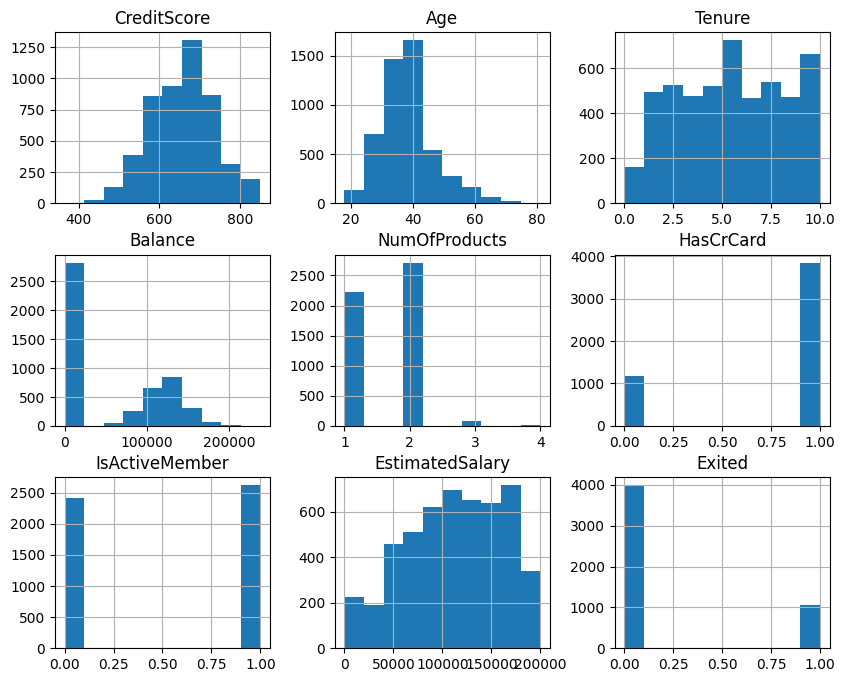

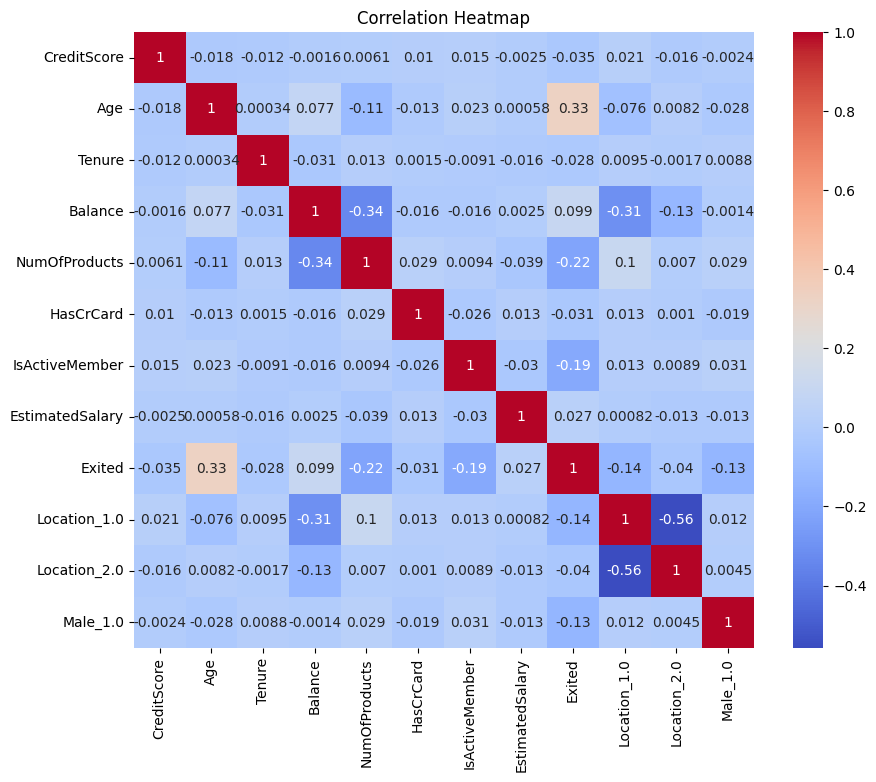

In [8]:
# Distribution of numerical features
df.hist(figsize=(10, 8))
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# 2.Transformations
### 2.1 Handle missing values, odd characters, and split the data. Apply any other transformations that you might consider necessary (e.g. OHE, Scaling, Imputation).

* Remember the effects of applying any transformations pre/post splitting.



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Defining feature matrix and target vector
X = df.drop(columns=['Exited'])
y = df['Exited']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())  # Show the first few rows of training data


      CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
594         594.0  57.0     2.0  123826.07            1.0        1.0   
2952        648.0  40.0     5.0  103023.26            1.0        1.0   
625         590.0  27.0     6.0       0.00            2.0        1.0   
450         563.0  27.0     9.0  115625.07            2.0        1.0   
4536        516.0  48.0     5.0       0.00            1.0        1.0   

      IsActiveMember  EstimatedSalary  Location_1.0  Location_2.0  Male_1.0  
594              1.0         78970.58         False          True     False  
2952             1.0         94811.85         False          True      True  
625              1.0         61820.09          True         False     False  
450              1.0         48725.68         False          True     False  
4536             0.0        120880.72          True         False     False  


# 3.Basic Decision Tree Models
### 3.1 Train and evaluate a Simple Decision Tree using either Gini or Entropy.

* Remember to consider metrics based on whether the dataset is imbalanced or not.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Train the decision tree model
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree using Gini")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




Decision Tree using Gini
[[661 129]
 [111 106]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       790
           1       0.45      0.49      0.47       217

    accuracy                           0.76      1007
   macro avg       0.65      0.66      0.66      1007
weighted avg       0.77      0.76      0.77      1007



### 3.2 Visualise the tree.


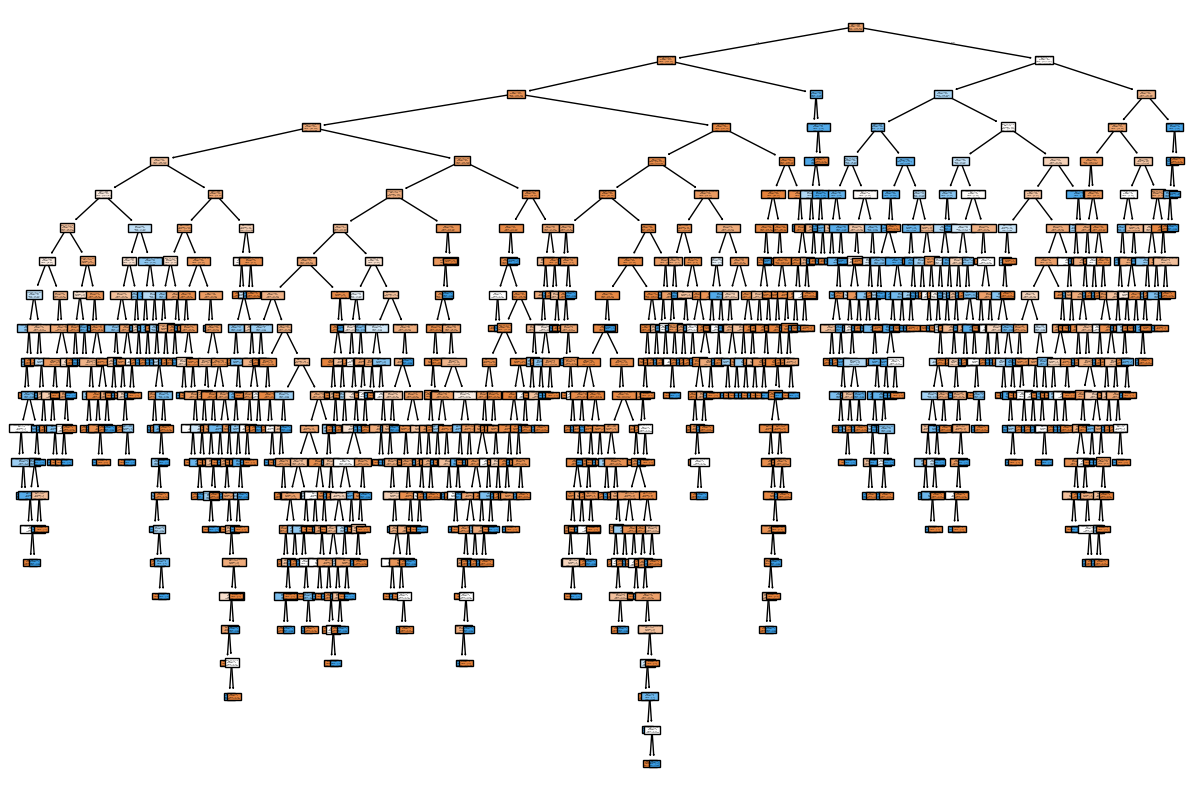

In [11]:
# Visualize the tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=['Not Exited', 'Exited'])
plt.show()

### 3.3 Train and evaluate a Simple Decision Tree using both `max_depth` and `min_samples_leaf`.


In [12]:
# Train a decision tree with max_depth and min_samples_leaf
dt_model_depth = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=10, random_state=42)
dt_model_depth.fit(X_train, y_train)

# Make predictions
y_pred_depth = dt_model_depth.predict(X_test)

# Evaluate the model
print("Decision Tree with max_depth and min_samples_leaf")
print(confusion_matrix(y_test, y_pred_depth))
print(classification_report(y_test, y_pred_depth))



Decision Tree with max_depth and min_samples_leaf
[[767  23]
 [138  79]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       790
           1       0.77      0.36      0.50       217

    accuracy                           0.84      1007
   macro avg       0.81      0.67      0.70      1007
weighted avg       0.83      0.84      0.82      1007



### 3.4 Visualise the tree


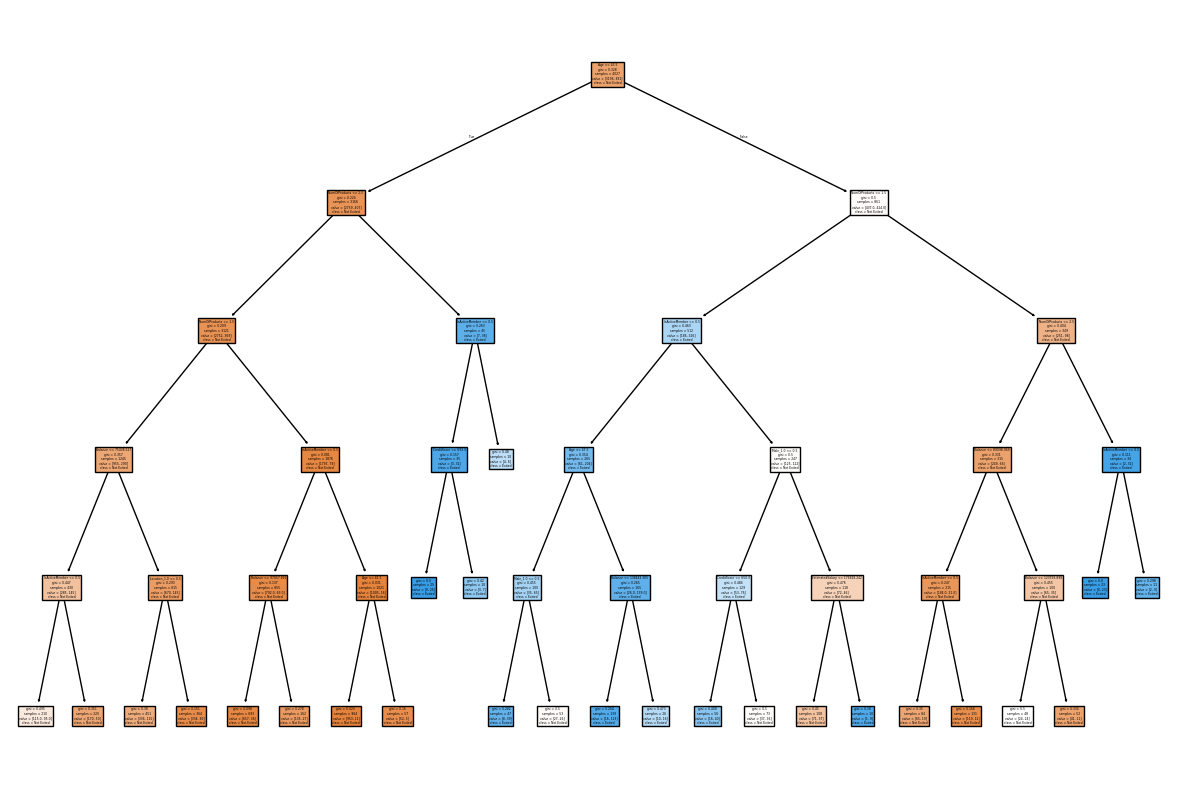

In [13]:
# Visualize the tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model_depth, filled=True, feature_names=X_train.columns, class_names=['Not Exited', 'Exited'])
plt.show()



### 3.5 Compare performance

# 4.Ensemble Methods and Their Comparison
### 4.1 Train and evaluate a Random Forest


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest
[[746  44]
 [110 107]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       790
           1       0.71      0.49      0.58       217

    accuracy                           0.85      1007
   macro avg       0.79      0.72      0.74      1007
weighted avg       0.84      0.85      0.84      1007



### 4.2 Train and evaluate a Simple Decision Tree using both `max_depth` and `min_samples_leaf`


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train a decision tree with specified max_depth and min_samples_leaf
dt_model_depth_leaf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=10, random_state=42)
dt_model_depth_leaf.fit(X_train, y_train)

# Make predictions
y_pred_depth_leaf = dt_model_depth_leaf.predict(X_test)

# Evaluate the model
print("Decision Tree with max_depth and min_samples_leaf")
print(confusion_matrix(y_test, y_pred_depth_leaf))
print(classification_report(y_test, y_pred_depth_leaf))


Decision Tree with max_depth and min_samples_leaf
[[767  23]
 [138  79]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       790
           1       0.77      0.36      0.50       217

    accuracy                           0.84      1007
   macro avg       0.81      0.67      0.70      1007
weighted avg       0.83      0.84      0.82      1007



### 4.3 Compare performance: Compare Random Forest against the simple Decision Tree

Random Forest Evaluation:
ROC Score: 0.7186956775360205
Accuracy Score: 0.8470705064548163

Simple Decision Tree Evaluation:
ROC Score: 0.6674706877442688
Accuracy Score: 0.8401191658391262


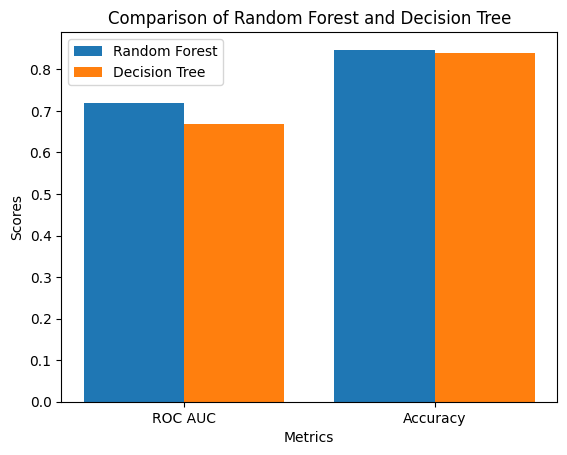

In [16]:
from sklearn.metrics import roc_auc_score, accuracy_score

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    roc_score = roc_auc_score(y_test, predictions)
    acc_score = accuracy_score(y_test, predictions)
    print(f"ROC Score: {roc_score}")
    print(f"Accuracy Score: {acc_score}")
    return roc_score, acc_score

# Evaluate the Random Forest
print("Random Forest Evaluation:")
roc_rf, acc_rf = evaluate_model(rf_model, X_test, y_test)

# Evaluate the Simple Decision Tree
print("\nSimple Decision Tree Evaluation:")
roc_dt, acc_dt = evaluate_model(dt_model_depth, X_test, y_test)

# Comparing the models using a bar chart
import matplotlib.pyplot as plt

# Performance metrics
metrics = ['ROC AUC', 'Accuracy']
rf_scores = [roc_rf, acc_rf]
dt_scores = [roc_dt, acc_dt]

# Plotting the results
x = range(len(metrics))
plt.bar(x, rf_scores, width=0.4, label='Random Forest', align='center')
plt.bar([p + 0.4 for p in x], dt_scores, width=0.4, label='Decision Tree', align='center')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Random Forest and Decision Tree')
plt.xticks([p + 0.2 for p in x], metrics)
plt.legend()
plt.show()
